# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [17]:
df = pd.read_csv('IPL 2022 Batters.csv')

Converting HS column from object type to int type by removing '*' from some values

In [ ]:
for i in range(len(df['HS'])):
  if df['HS'][i][-1]=='*':
    df['HS'][i] = df['HS'][i].replace('*','')
df['HS'] = df['HS'].astype(int)

Removing '-' from Avg and converting it to Float type

In [ ]:
ind = []
for i in range(162):
    try:
      df['Avg'][i]=float(df['Avg'][i])
    except :
      ind.append(i)
df['Avg'][ind[:]]=0.0

median_Avg = df.Avg.median()
df['Avg'][ind[:]]=median_Avg
df['Avg'] = df['Avg'].astype(float)

## Data Visualisation

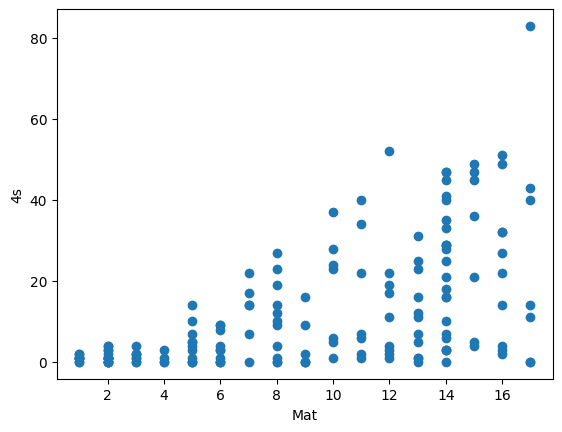

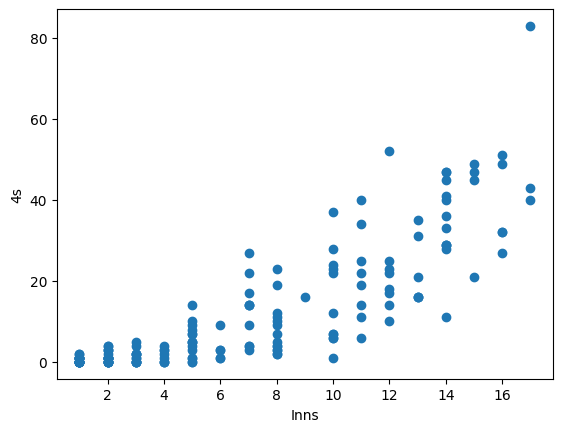

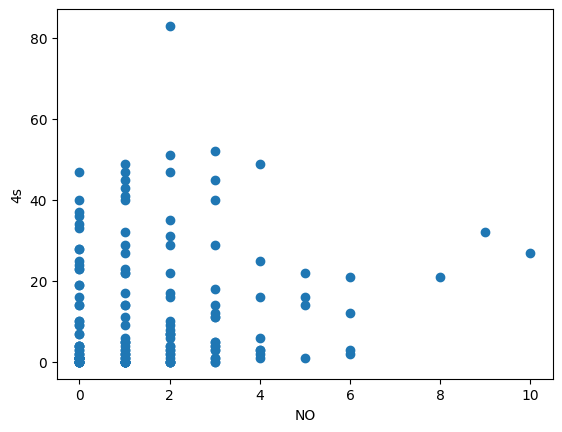

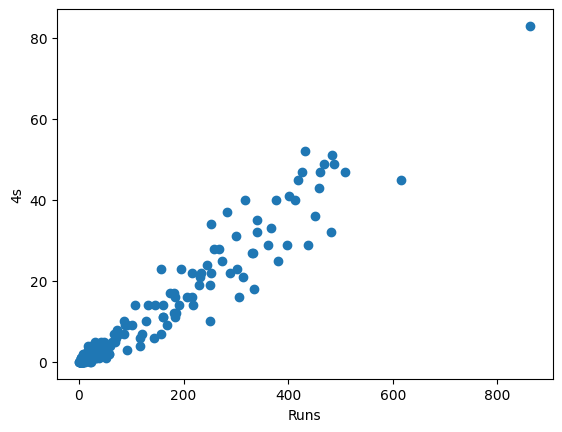

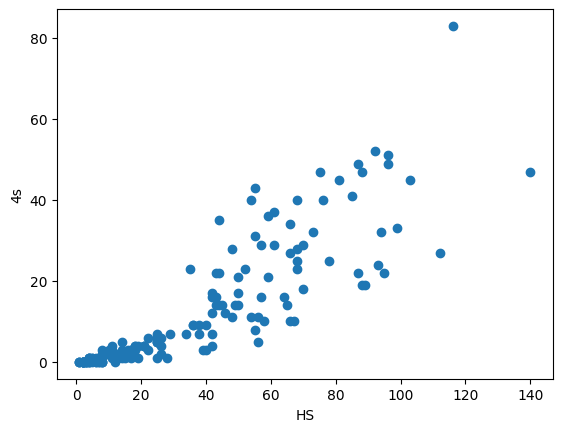

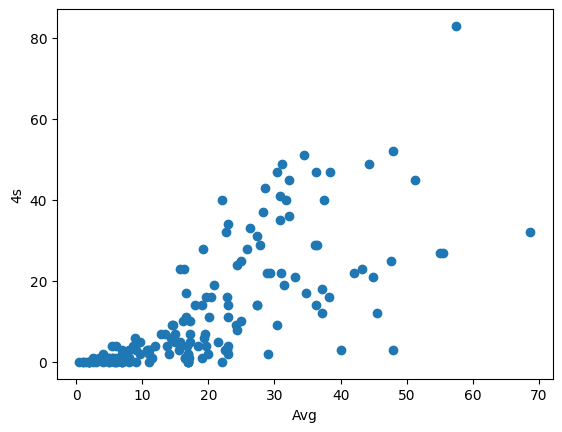

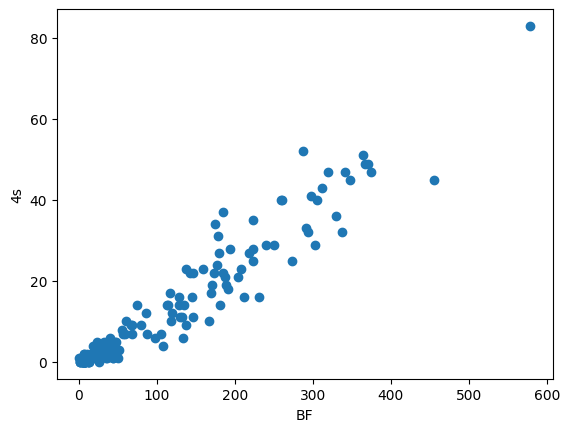

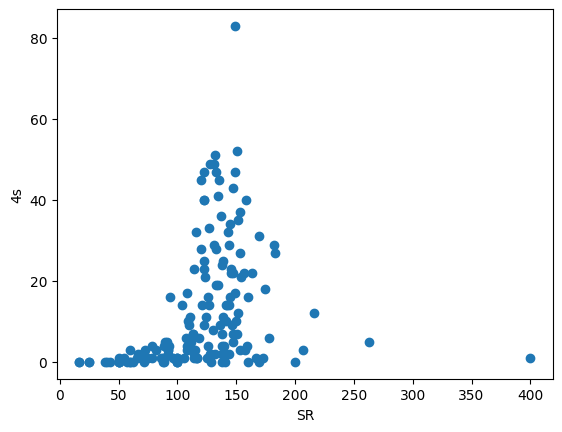

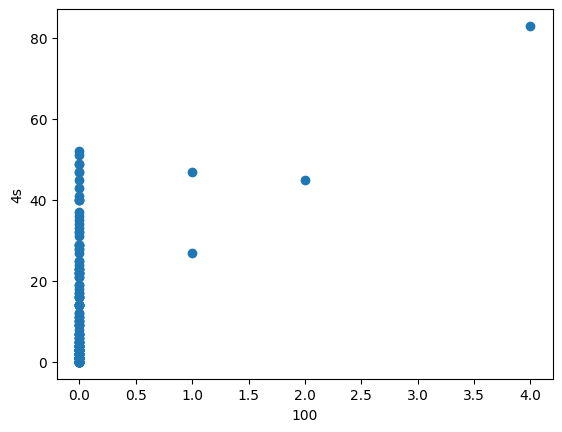

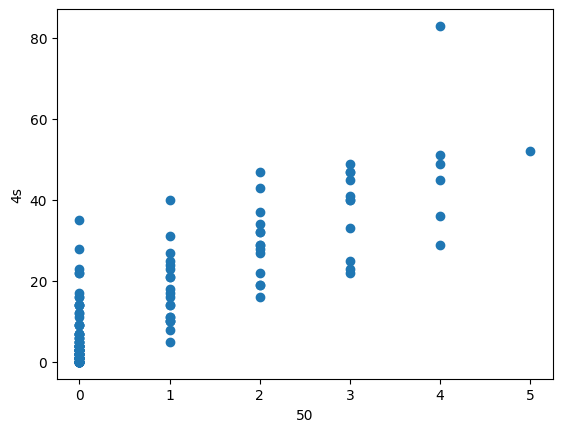

In [26]:
for label in df.columns[1:-1]:
  plt.scatter(df[label],df['4s'])
  plt.ylabel("4s")
  plt.xlabel(label)
  plt.show()



## Spliting data

In [30]:
train, test = train_test_split(df, random_state=104,test_size=0.35, shuffle=True)

In [31]:
X_train = train[['Mat','Inns','Runs','HS','Avg','BF']].values
y_train = train['4s'].values
X_test = test[['Mat','Inns','Runs','HS','Avg','BF']].values
y_test = test['4s'].values

In [32]:
reg = linear_model.LinearRegression()
reg.fit(train[['Mat','Inns','Runs','HS','Avg','BF']],train['4s'])

LinearRegression()

## Mean Squared Error

In [11]:
def mean_sqr_err(pred_y,real_y,len):
  count = 0
  for i in range(len):
    error = pred_y[i]-real_y[i]
    count += error**2
  count = count/len
  return count

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

## Value of Mean Squared Error for Train and Test data

In [37]:
print(f"Mean Squared Error for Training Data : {mean_sqr_err(y_pred_train,y_train,len(train))}")
print(f"Mean Squared Error for Test Data : {mean_sqr_err(y_pred_test,y_test,len(test))}")

Mean Squared Error for Training Data : 15.072525561837171
Mean Squared Error for Test Data : 15.811935186660824


## Visual Comparison of prediction with real values

Orange Dots are predicted 4s in Train Data

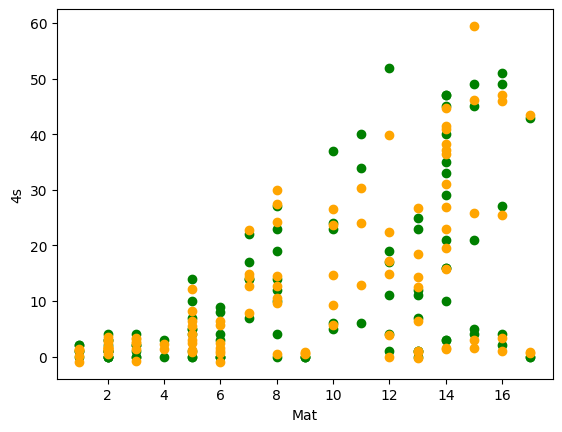

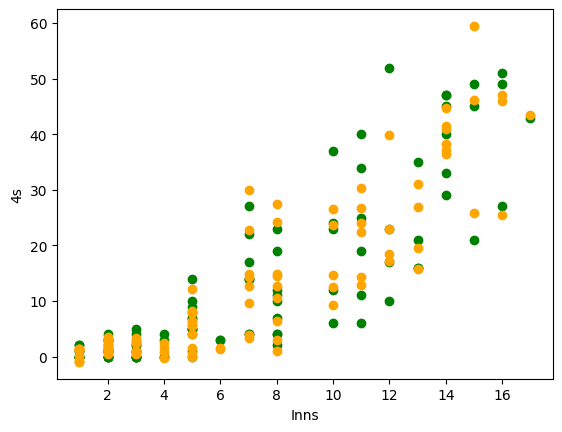

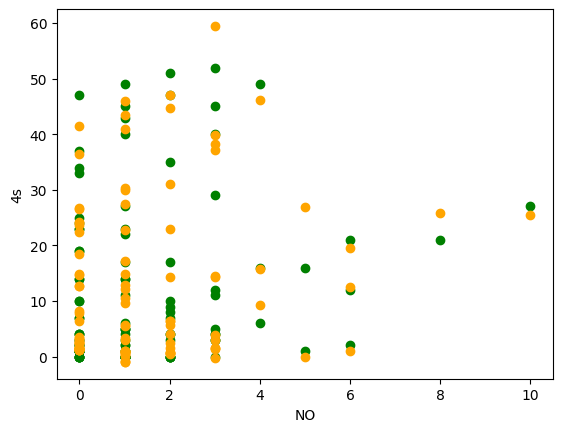

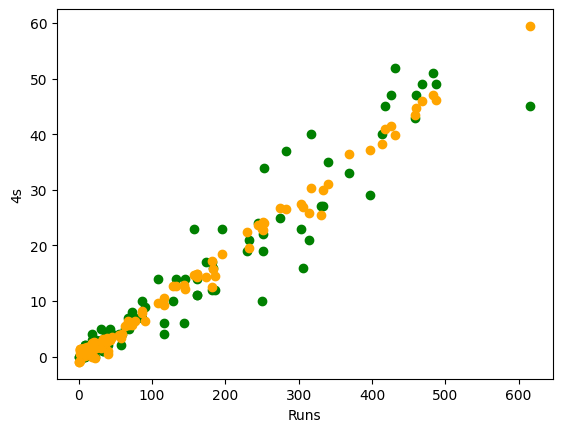

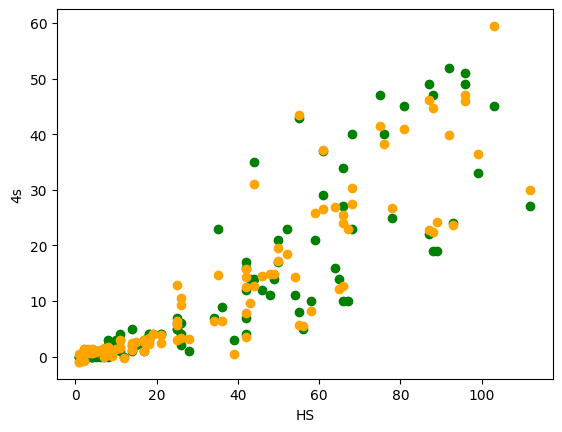

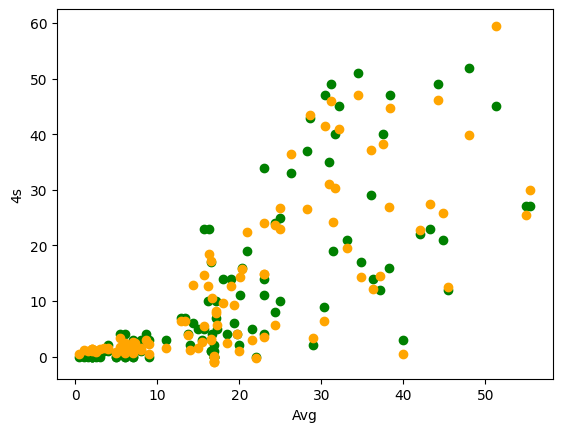

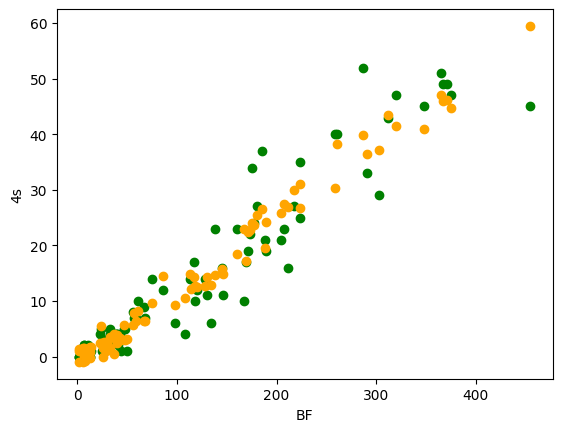

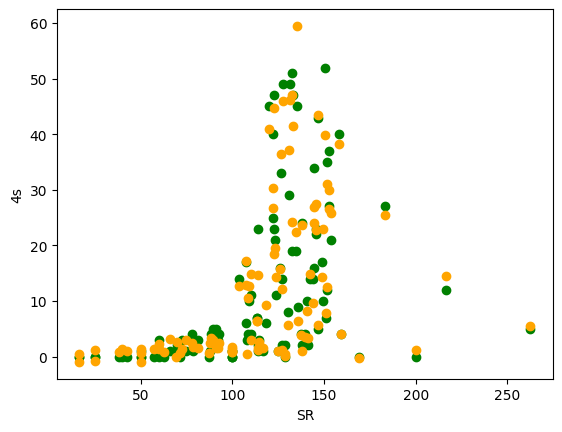

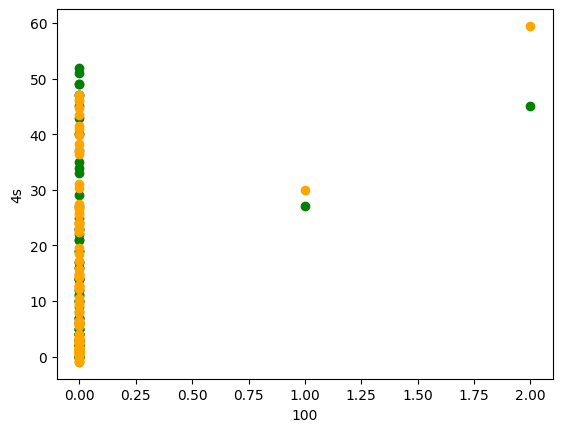

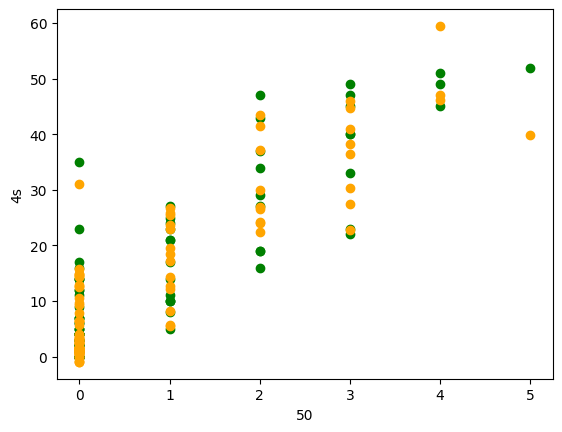

In [35]:
for label in df.columns[1:-1]:
  plt.scatter(train[label],y_train,color='g')
  plt.ylabel("4s")
  plt.xlabel(label)
  plt.scatter(train[label],y_pred_train,c='orange')
  plt.show()

Blue Dots are predicted 4s in Test Data

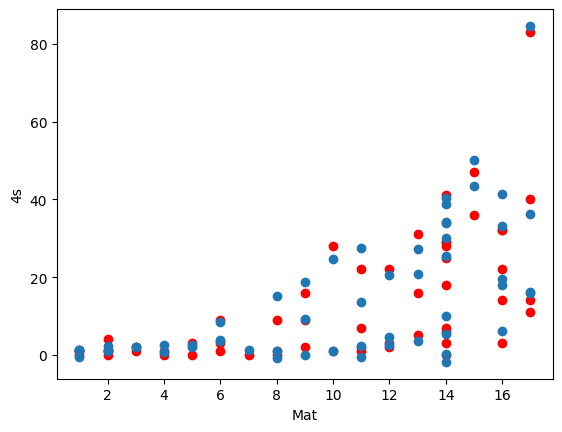

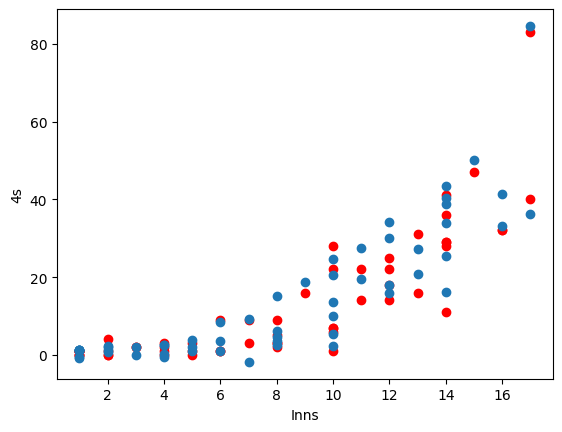

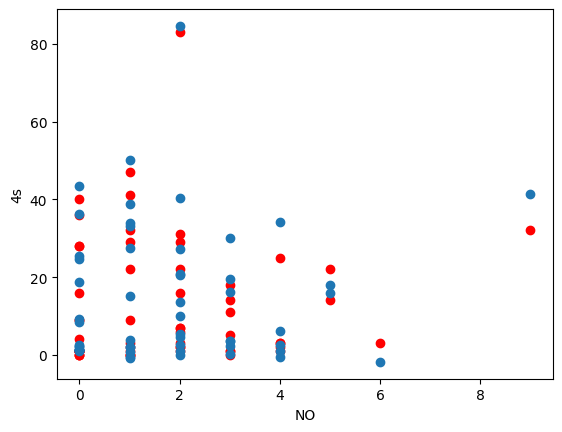

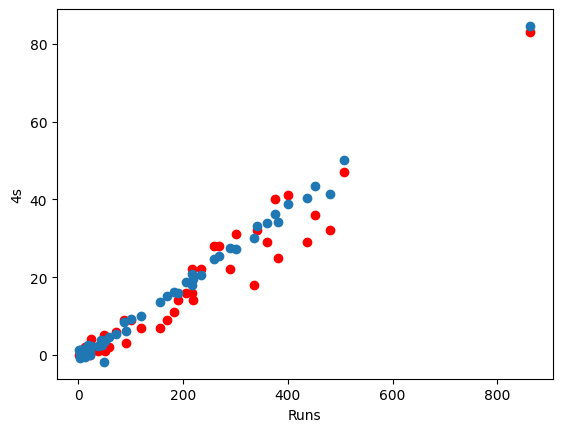

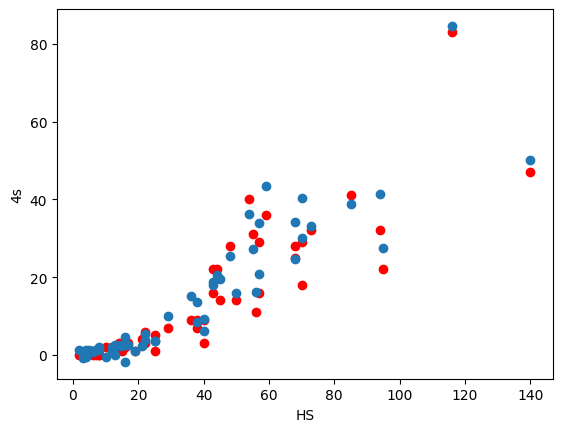

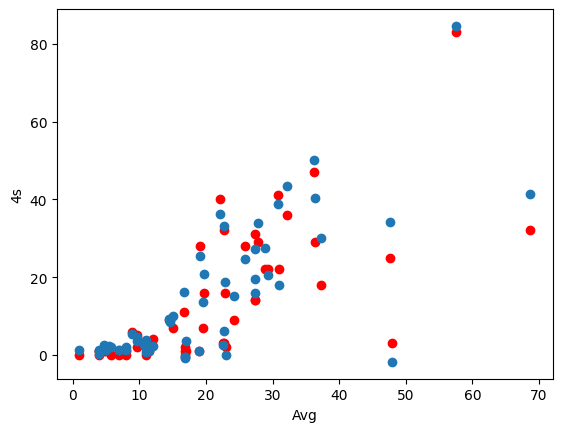

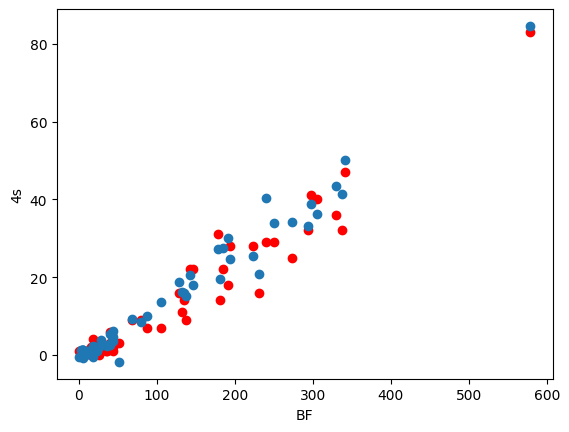

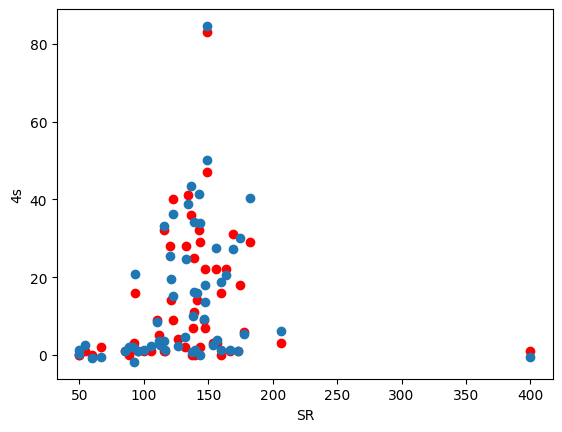

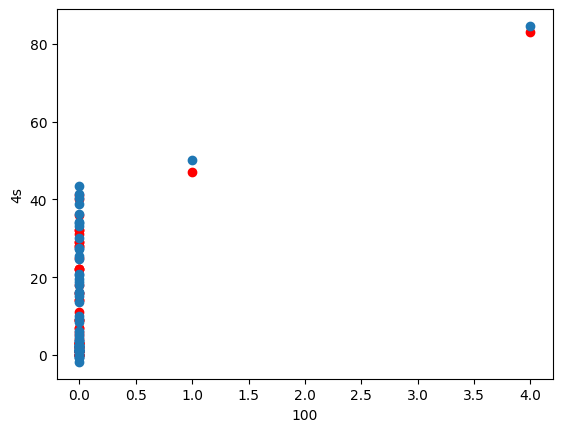

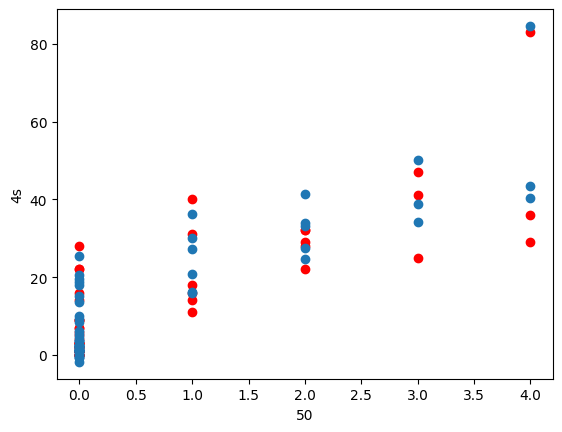

In [36]:
for label in test.columns[1:-1]:
  plt.scatter(test[label],y_test,color='r')
  plt.ylabel("4s")
  plt.xlabel(label)
  plt.scatter(test[label],y_pred_test)
  plt.show()